### Sumário

- Sistema linear como problema de otimização
- Resolvendo um sistema linear com o método do gradiente descendente
- Resolvendo um sistema linear através das condições de otimalidade
- Conclusão

In [411]:
import numpy as np
import matplotlib.pyplot as plt

In [412]:
A = np.array([[1, 2, -1], [2, 2, 2], [1, -1, 2]], dtype='float')

In [413]:
b = np.array([2, 12, 5], dtype='float')

### Sistema linear como problema de otimização

Aqui vamos ver como é possível escrever um sistema linear como um problema de otimização e usar o método do gradiente descendente para resolve-lo.

Como mostrado no início, um sistema linear pode ser representado pela seguinte equação matricial:

$Ax = b$

Desse modo, assumindo que o sistem tem um única solução, teremos que em $x_{sol}$:

$Ax_{sol}-b = \overline{0}$

Ou seja, na solução teremos o vetor cuja norma é 0. Assim podemos rescrever o problema como:

$\underset{\overline{x}}{\operatorname{argmin}} \frac{1}{2}||Ax-b||^2$

Note que o mínimo da função quadrática ocorre quando temos $x = x_{sol}$. 

### Resolvendo um sistema com o método do gradiente descendente

Para aplicarmos o método do gradiente descendente neste problema, precisamos calcular o gradiente da função quadrática apresentada anteriormente, neste caso temos:

$\nabla_{x}f = A^{T}Ax - A^{T}b$

Assim, podemos aplicar o método do gradiente descendente e observar sua convergência, olhando a o valor da função vetorial $f(\overline{x}) = \frac{1}{2}||Ax-b||^2$

In [443]:
def flin(A, b, x):
    return 0.5*np.linalg.norm(np.dot(A, x)-b)**2

def grad_flin(A, b, x):
    return np.dot(np.dot(A.T, A), x) - np.dot(A.T, b)

In [444]:
# Implementação método gradiente descendente
def gradient_descent(fx, gradx, x0, delta_lim, alpha, max_it = 300):
    x_steps = [x0]
    fx_steps = [f(x0)]
    
    delta = f(x0)
    x = x0
    it = 0
    while np.abs(delta) > delta_lim and it < max_it:
        x_prev = np.copy(x)
        x -= alpha*gradx(x)
        delta = np.max(np.abs(x_prev - x))
        it += 1
        x_steps.append(np.copy(x))
        fx_steps.append(f(x))
    
    return x_steps, fx_steps
    

In [451]:
x0 = np.array([0, 0, 0], dtype='float')
f = lambda x: flin(A, b, x)
grad_f = lambda x: grad_flin(A, b, x)
x_steps, f_steps = gradient_descent(f, grad_f, x0, 1e-6, 3e-2, max_it=1000)

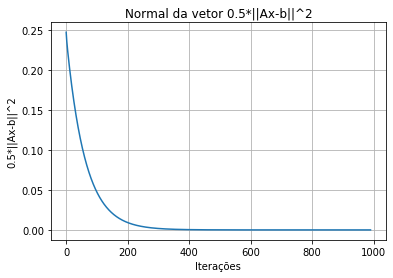

In [452]:
plt.plot(f_steps[10:])
plt.title("Normal da vetor 0.5*||Ax-b||^2")
plt.ylabel("0.5*||Ax-b||^2")
plt.xlabel("Iterações")
plt.grid()

Vemos que o algorítmo converge para o vetor nulo, e consequentemente o vetor x converge para $x_{sol}$. Podemos analisar também a convergencia de cada componente de x individuamente.

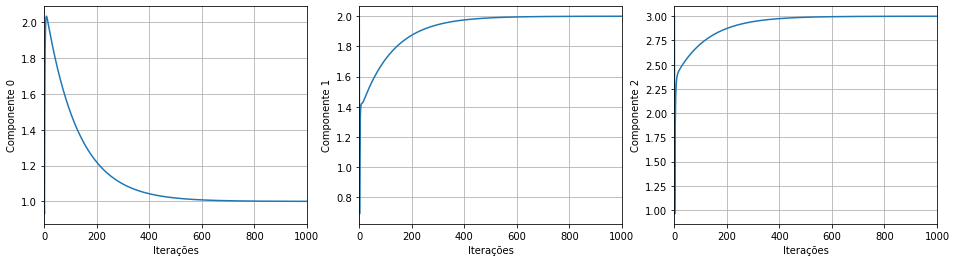

In [453]:
fig, axs = plt.subplots(1, len(x0), figsize=(16,4))
for idx, (step, ax) in enumerate(zip(np.array(x_steps).T, axs)):
    ax.plot(step)
    ax.set_ylabel("Componente " + str(idx))
    ax.set_xlabel("Iterações")
    ax.set_xlim([0, 1000])
    ax.grid()



### Resolvendo um sistema através das condições de otimalidade

Relembrando as aulas de cálculo sabemos que uma função atinge ponto de mínimo local quando:

$\frac{df}{dx}$ = 0 e $\frac{d^2f}{dx^2} > 0$

e caso a função f seja convexa também temos a garantia de um mínimo global.

Para funções de mais de uma variável, basta usarmos a generalização de derivadade e derivada segunda, isto é, o gradiente e a matriz Hessiana.

$\nabla_{x}f = 0$ e $xHx > 0$

Ou seja, necessitamos que o gradiente seja zero a matriz Hessian seja positiva definida.

Vamos aplicar essas condições a função: $f(x) = \frac{1}{2}||Ax-b||^2$

$\nabla_{x}f = A^{T}Ax - A^{T}b = 0 =>  x = {(A^TA)}^{-1}A^{T}b$ e $H = A^{T}A$ > 0

Assim, sabemos que a solução do sistema também pode ser calculada pela expressão acima, vamos conferir:

In [464]:
x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
x

array([1., 2., 3.])

Porém a solução também pode ser calculada usando o método tradicional de inverter a matriz A:

In [465]:
np.dot(np.linalg.inv(A), b)

array([1., 2., 3.])

Ou seja, a expressão $(A^{T}A)^{-1}A^{T}$ é igual a $A^{-1}$, de fato, caso $A$ e $A^{T}$ possuam inversas podemos reescrever a expressão:

$(A^{T}A)^{-1}A^{T} = A^{-1}(A^{T})^{-1}A^{T} = A^{-1}$

Por fim, vamos mostras que a matriz Hessian é positiva definina positiva, uma maneira de verificarmos é observar que todos seus autovalores são positivos, vamos calcula-los:

In [468]:
np.linalg.eig(np.dot(A.T, A))[0]

array([ 0.27158385, 14.72841615,  9.        ])

### Conclusão

Neste tópico discutimos:
- Como reescrever o problema de resolver um sistema linear como um problema de minização
- Implementação e aplicação do método do gradiente descendente para funções vetoriais
- Solução de um sistema linear através da aplicação das condições de otimalidade
- Equivalência entre a solução obtida com a aplicação das condições da otimilidade e a tradicional solução de inverter a matriz A